In [1]:
# Import the relevant Python libraries and modules needed in this lab.
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

In [2]:
#Import Data
HR_Dataset = pd.read_csv("HR.csv")

In [3]:
# Display the first 10 rows of the data.
HR_Dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [142]:
#Check ranges for variables
print(HR_Dataset.describe(include='all'))

        satisfaction_level  last_evaluation  number_project  \
count         14999.000000     14999.000000    14999.000000   
unique                 NaN              NaN             NaN   
top                    NaN              NaN             NaN   
freq                   NaN              NaN             NaN   
mean              0.612834         0.716102        3.803054   
std               0.248631         0.171169        1.232592   
min               0.090000         0.360000        2.000000   
25%               0.440000         0.560000        3.000000   
50%               0.640000         0.720000        4.000000   
75%               0.820000         0.870000        5.000000   
max               1.000000         1.000000        7.000000   

        average_montly_hours  time_spend_company  Work_accident          left  \
count           14999.000000        14999.000000   14999.000000  14999.000000   
unique                   NaN                 NaN            NaN           NaN   


In [6]:
# Get the data types and number of non-null values in the dataset.
HR_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
# Identify the number of rows and columns in the dataset.
HR_Dataset.shape

(14999, 10)

In [85]:
#Find the number of missing values in each column in this dataset.
HR_Dataset.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [104]:
# Count duplicated rows.
from collections import Counter
count=Counter(HR_Dataset)
# Total number of duplicates (elements with count greater than 0)
total_duplicates = sum(count for element, count in count.items()if count > 0)

# Print the total number of duplicates
print("Total duplicate elements:", total_duplicates)

Total duplicate elements: 10


In [115]:
# Check for duplicates.
HR_Dataset.drop_duplicates().shape

(11991, 10)

In [18]:
import pandas as pd

# Sample DataFrame with categorical data
HR_Dataset = {'salary': ['low', 'medium', 'high']}
df = pd.DataFrame(HR_Dataset)

# Define a mapping dictionary
category_mapping = {'low': 0, 'medium': 1, 'high': 2}

# Replace categorical strings with numerical values
df['salary'] = df['salary'].map(category_mapping)

In [15]:
# Sample dataset
HR_Dataset = {'salary': ['low', 'medium', 'high']}
df = pd.DataFrame(HR_Dataset)

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the data
encoded_data = encoder.fit_transform(df[['salary']]).toarray()

# Convert the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['salary']))

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Create a new column with numerical data
df['salary_new'] = encoded_df.sum(axis=1)

# Print the updated DataFrame
print(df)



   salary  salary_high  salary_low  salary_medium  salary_new
0     low          0.0         1.0            0.0         1.0
1  medium          0.0         0.0            1.0         1.0
2    high          1.0         0.0            0.0         1.0


In [16]:
df.head(10)

,salary,salary_high,salary_low,salary_medium,salary_new
0,low,0.0,1.0,0.0,1.0
1,medium,0.0,0.0,1.0,1.0
2,high,1.0,0.0,0.0,1.0


In [145]:
#Remove missing values in your data.
HR_Dataset.dropna()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Find the number of missing values in each column in the dataset.
HR_Dataset.isna().any(axis=1).sum()

0

In [12]:
# Display the data types of the columns in the data set
HR_Dataset.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [13]:
#Check ranges for all variables
HR_Dataset.describe(include = 'all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


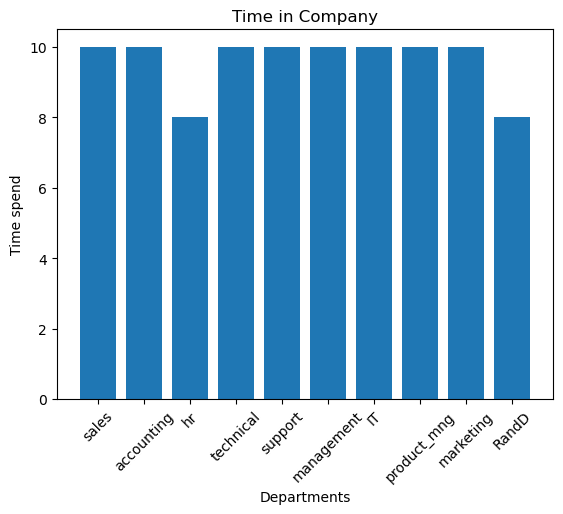

In [30]:
# Data labels and values
labels = HR_Dataset['department']
values = HR_Dataset['time_spend_company']

# Create bar graph
plt.bar(labels, values)

# Add title and labels
plt.title('Time in Company')
plt.xlabel('Departments')
plt.ylabel('Time spend')
# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)
# Show plot
plt.show()

C:\Users\User\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


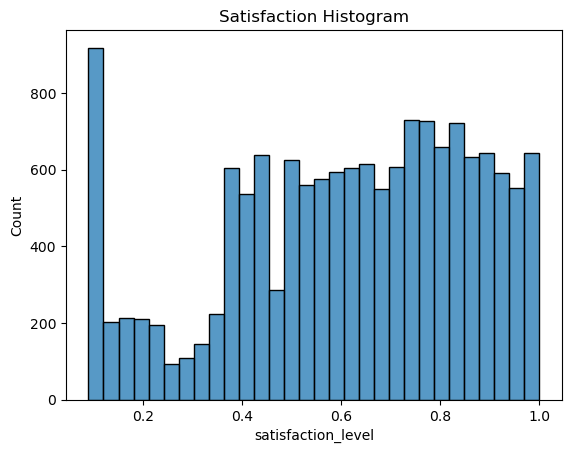

In [120]:
# Plot histogram
sns.histplot(data=HR_Dataset,x= 'satisfaction_level')
plt.title('Satisfaction Histogram')
# Show plot
plt.show()

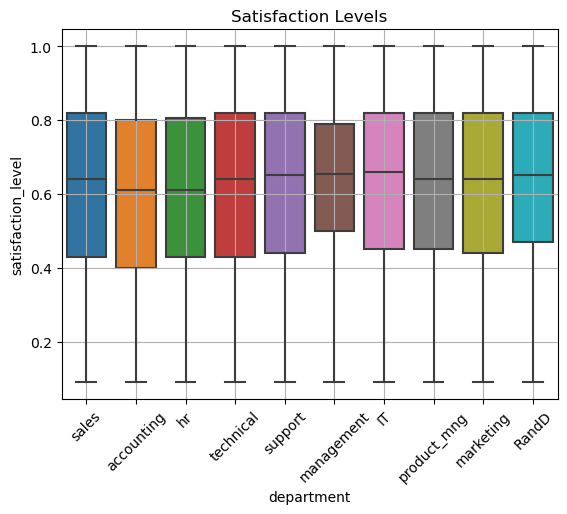

In [31]:
# Create boxplot(good for determining outliers)
sns.boxplot(x=HR_Dataset['department'],y=HR_Dataset['satisfaction_level'])
# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)
# Displaying the plot
plt.title('Satisfaction Levels')
plt.grid(True)
plt.show()

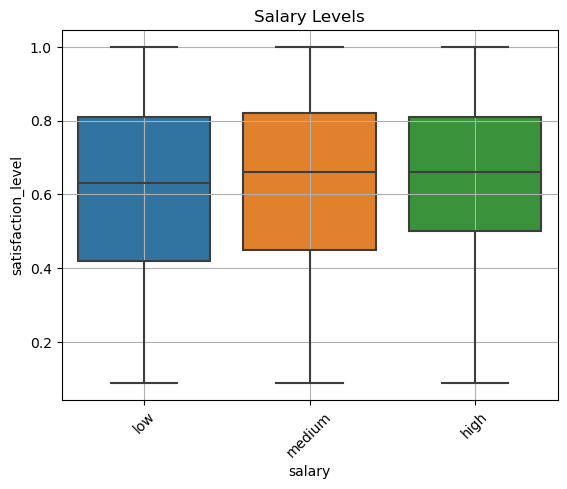

In [33]:
# Create boxplot(good for determining outliers)
sns.boxplot(x=HR_Dataset['salary'],y=HR_Dataset['satisfaction_level'])
# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)
# Displaying the plot
plt.title('Salary Levels')
plt.grid(True)
plt.show()

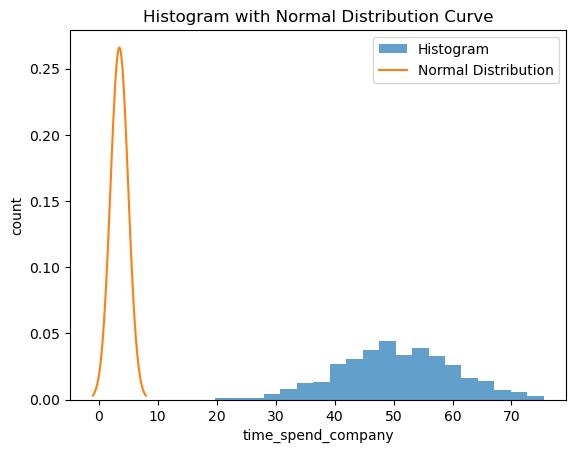

In [122]:
# Define parameters for the normal distribution
mean = 3.5  # Adjust this for your desired mean
std_dev = 1.5  # Adjust this for your desired standard deviation

# Generate random data from the normal distribution
time_spend_company = np.random.randn(1000) * std_dev + mean  # Sample size of 1000

# Create the histogram
plt.hist(data, bins=20, density=True, alpha=0.7, label='Histogram')  # Adjust bins for better visualization

# Generate x-axis values for the normal distribution curve
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)  # Range covers 3 standard deviations

# Calculate the probability density function (PDF) of the normal distribution
y = norm.pdf(x, mean, std_dev)

# Plot the normal distribution curve
plt.plot(x, y, label='Normal Distribution')

# Add labels and title
plt.xlabel('time_spend_company')
plt.ylabel('count')
plt.title('Histogram with Normal Distribution Curve')

# Add legend
plt.legend()

# Show the plot
plt.show()


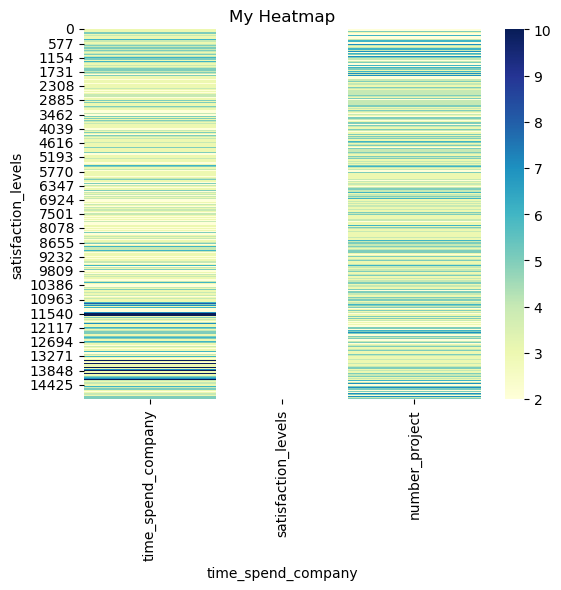

In [128]:
# Creating a heatmap
df = pd.DataFrame(HR_Dataset, columns=['time_spend_company', 'satisfaction_levels','number_project'])
# Create a heatmap
sns.heatmap(df, cmap="YlGnBu")  # Adjust "YlGnBu" for different colormaps
# Add title and labels (optional)
plt.title("My Heatmap")
plt.xlabel("time_spend_company")
plt.ylabel("satisfaction_levels")

# Show the plot
plt.show()

In [4]:
#Sampling with replacement.
sampled_data = HR_Dataset.sample(n=50, replace=True, random_state=31208)
sampled_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
9831,0.64,0.81,3,209,3,0,0,0,management,low
7378,0.44,0.42,3,178,3,0,0,0,support,high
7017,0.52,0.84,4,212,3,0,0,0,IT,medium
10933,0.58,0.97,3,274,4,1,0,1,sales,medium
3420,0.59,0.55,4,235,2,0,0,0,IT,medium
2296,0.52,0.53,2,163,2,0,0,0,marketing,low
11540,0.44,0.41,3,125,7,0,0,0,sales,medium
7518,0.85,0.55,5,182,3,0,0,0,technical,low
13564,0.36,0.73,2,111,2,0,0,0,sales,low
6154,0.73,0.80,4,251,2,1,0,0,support,low


In [5]:
print("Use head() to show a sample of data")
print(sampled_data.head())


Use head() to show a sample of data
       satisfaction_level  last_evaluation  number_project  \
9831                 0.64             0.81               3   
7378                 0.44             0.42               3   
7017                 0.52             0.84               4   
10933                0.58             0.97               3   
3420                 0.59             0.55               4   

       average_montly_hours  time_spend_company  Work_accident  left  \
9831                    209                   3              0     0   
7378                    178                   3              0     0   
7017                    212                   3              0     0   
10933                   274                   4              1     0   
3420                    235                   2              0     0   

       promotion_last_5years  department  salary  
9831                       0  management     low  
7378                       0     support    high  
7017 

In [19]:
#Calculate the mean
estimate1 = sampled_data['satisfaction_level'].mean()
estimate1

0.6054

In [20]:
print(sampled_data.describe(include='all'))

        satisfaction_level  last_evaluation  number_project  \
count            50.000000        50.000000        50.00000   
unique                 NaN              NaN             NaN   
top                    NaN              NaN             NaN   
freq                   NaN              NaN             NaN   
mean              0.605400         0.669600         3.62000   
std               0.211604         0.170653         1.21033   
min               0.180000         0.410000         2.00000   
25%               0.440000         0.530000         3.00000   
50%               0.625000         0.645000         4.00000   
75%               0.737500         0.807500         4.00000   
max               0.990000         1.000000         7.00000   

        average_montly_hours  time_spend_company  Work_accident       left  \
count              50.000000           50.000000      50.000000  50.000000   
unique                   NaN                 NaN            NaN        NaN   
top      

In [21]:
print("For a more thorough examination of observations by salary use values_counts()")
print(sampled_data['salary'].value_counts())


For a more thorough examination of observations by salary use values_counts()
salary
medium    24
low       23
high       3
Name: count, dtype: int64


In [22]:
print("For a more thorough examination of observations by department use values_counts()")
print(sampled_data['department'].value_counts())


For a more thorough examination of observations by department use values_counts()
department
sales          15
support        10
technical       7
IT              4
product_mng     4
management      3
RandD           3
hr              2
marketing       1
accounting      1
Name: count, dtype: int64


In [6]:
# Comparing means using a two-sample t-test.
stats.ttest_ind(a=sampled_data['satisfaction_level'], b=sampled_data['time_spend_company'], equal_var=False)


TtestResult(statistic=-14.897878379726613, pvalue=1.902274542021244e-20, df=52.229809258326505)

C:\Users\User\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


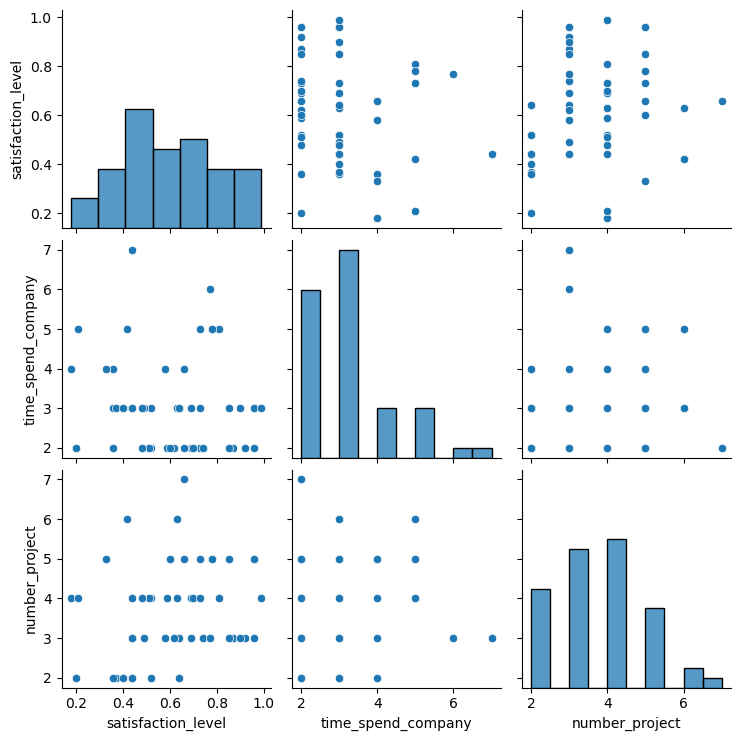

In [7]:
# Create pairwise scatterplots of data set
numerical_columns = ["satisfaction_level", "time_spend_company", "number_project"]
sns.pairplot(sampled_data[numerical_columns])
# Show the plot
plt.show()

In [2]:
print('Model Construction')
# Subset Data
ols_data = sampled_data[["time_spend_company", "satisfaction_level"]]

# Write out formula
ols_formula = "satisfaction_level ~ time_spend_company"

# Build OLS, fit model to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

# Best fit regression line
sns.regplot(x = "time_spend_company", y = "satisfaction_level", data = ols_data)


Model Construction


NameError: name 'sampled_data' is not defined

In [3]:
# Call the summary() function on the model object to get the coefficients and more statistics about the model.
model.summary()

NameError: name 'model' is not defined

Model Construction


<Axes: xlabel='last_evaluation', ylabel='satisfaction_level'>

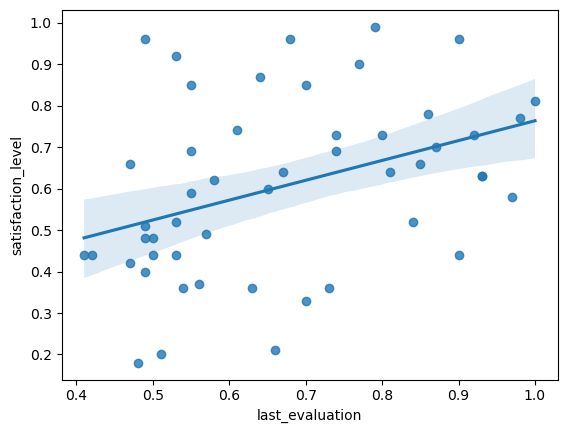

In [14]:
print('Model Construction')
# Subset Data
ols_data = sampled_data[["last_evaluation", "satisfaction_level"]]

# Write out formula
ols_formula = "satisfaction_level ~ last_evaluation"

# Build OLS, fit model to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

# Best fit regression line
sns.regplot(x = "last_evaluation", y = "satisfaction_level", data = ols_data)

In [15]:
# Call the summary() function on the model object to get the coefficients and more statistics about the model.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     satisfaction_level   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     8.398
Date:                Tue, 09 Apr 2024   Prob (F-statistic):            0.00564
Time:                        10:22:26   Log-Likelihood:                 11.241
No. Observations:                  50   AIC:                            -18.48
Df Residuals:                      48   BIC:                            -14.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2850      0.114      2.499      0.016       0.056       0.514
last_evaluation     0.4785      0.165      2.898      0.006       0.147       0.810
==============================================================================
Omnibus:                        0.606   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.739   Jarque-Bera (JB):                0.705
Skew:                           0.231   Prob(JB):                        0.703
Kurtosis:                       2.647   Cond. No.                         8.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
# Best fit regression line
sns.regplot(x = "time_spend_company", y = "satisfaction_level", data = ols_data)

NameError: name 'sns' is not defined

Check the normality assumption


C:\Users\User\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


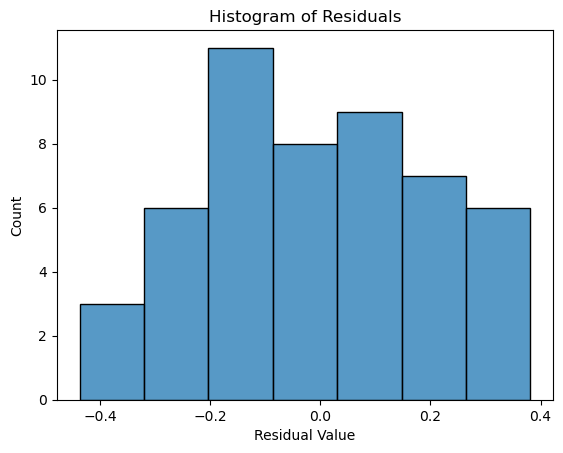

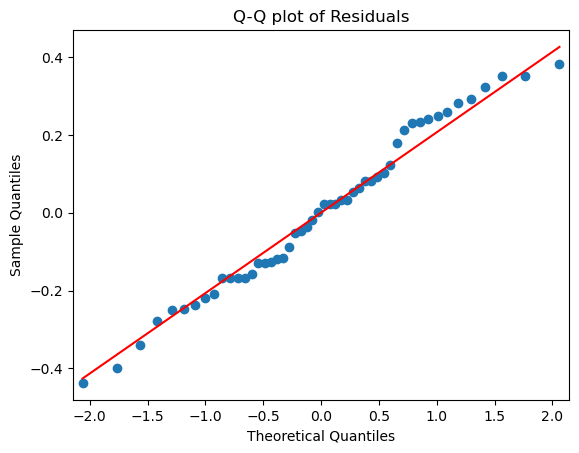

In [16]:
print('Check the normality assumption')
# Get the residuals from the model
residuals = model.resid
# Visualize the distribution of the residuals
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()
# Create a Q-Q plot 
sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()

In [6]:
print('Check the assumptions of independent observation and homoscedasticity')
# Sample data (replace with your data loading)
x = sampled_data['time_spend_company']
y = sampled_data['satisfaction_level']

# OLS model for residuals
model = sm.OLS(y, sm.add_constant(x)).fit()

# Check for independence (visually)
plt.scatter(model.resid, model.fittedvalues)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Check for homoscedasticity (visually)
plt.scatter(model.resid, model.fittedvalues)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Breusch-Pagan Test for homoscedasticity
bp_test = sm.stats.diagnostic.het_breuschpagan(model)
print(f"Breusch-Pagan Test: p-value = {bp_test.pvalue}")

Check the assumptions of independent observation and homoscedasticity


NameError: name 'sampled_data' is not defined

In [32]:
print('Multiple Linear Regression')
print('Create a hold out sample')
# Subset X and y variables
sampled_data_X = sampled_data[["time_spend_company","last_evaluation", "number_project"]]
sampled_data_y = sampled_data[["satisfaction_level"]]

# Create training data sets and holdout (testing) data sets
X_train, X_test, y_train, y_test = train_test_split(sampled_data_X, sampled_data_y, test_size = 0.3, random_state = 42)

Multiple Linear Regression
Create a hold out sample


In [33]:
print('Model construction')
# Write out OLS formula as a string
ols_formula = "(satisfaction_level ~ time_spend_company + last_evaluation + number_project)"

# Create OLS dataframe
ols_data = pd.concat([X_train, y_train], axis = 1)

# Create OLS object and fit the model
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()


Model construction


In [13]:
print ('Model evaluation and interpretation')
# Get model results
model.summary()

Model evaluation and interpretation


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     satisfaction_level   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     2.814
Date:                Tue, 09 Apr 2024   Prob (F-statistic):             0.0555
Time:                        10:18:36   Log-Likelihood:                 8.6971
No. Observations:                  35   AIC:                            -9.394
Df Residuals:                      31   BIC:                            -3.173
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.4151      0.173      2.398      0.023       0.062       0.768
time_spend_company    -0.0541      0.030     -1.819      0.079      -0.115       0.007
last_evaluation        0.4616      0.219      2.107      0.043       0.015       0.908
number_project         0.0176      0.036      0.490      0.628      -0.056       0.091
==============================================================================
Omnibus:                        1.765   Durbin-Watson:                   1.022
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                1.235
Skew:                           0.199   Prob(JB):                        0.539
Kurtosis:                       2.170   Cond. No.                         37.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
print('Model construction')
# Write out OLS formula as a string
ols_formula = "(satisfaction_level ~ last_evaluation + number_project)"

# Create OLS dataframe
ols_data = pd.concat([X_train, y_train], axis = 1)

# Create OLS object and fit the model
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

Model construction


In [42]:
print ('Model evaluation and interpretation')
# Get model results
model.summary()

Model evaluation and interpretation


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     satisfaction_level   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     2.394
Date:                Tue, 09 Apr 2024   Prob (F-statistic):              0.107
Time:                        11:01:56   Log-Likelihood:                 6.9224
No. Observations:                  35   AIC:                            -7.845
Df Residuals:                      32   BIC:                            -3.179
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2854      0.163      1.748      0.090      -0.047       0.618
last_evaluation     0.4183      0.225      1.856      0.073      -0.041       0.878
number_project      0.0129      0.037      0.346      0.732      -0.063       0.089
==============================================================================
Omnibus:                        0.237   Durbin-Watson:                   1.251
Prob(Omnibus):                  0.888   Jarque-Bera (JB):                0.431
Skew:                           0.105   Prob(JB):                        0.806
Kurtosis:                       2.498   Cond. No.                         28.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
print('Model Building')

# Define the OLS formula.
ols_formula = 'satisfaction_level ~ number_project +  last_evaluation' 

# Create an OLS model.
OLS = ols(formula = ols_formula, data = ols_data)

# Fit the model.
model = OLS.fit()

# Save the results summary.
model_results = model.summary()

# Display the model results.
model_results


Model Building


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     satisfaction_level   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     2.394
Date:                Tue, 09 Apr 2024   Prob (F-statistic):              0.107
Time:                        11:04:20   Log-Likelihood:                 6.9224
No. Observations:                  35   AIC:                            -7.845
Df Residuals:                      32   BIC:                            -3.179
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2854      0.163      1.748      0.090      -0.047       0.618
number_project      0.0129      0.037      0.346      0.732      -0.063       0.089
last_evaluation     0.4183      0.225      1.856      0.073      -0.041       0.878
==============================================================================
Omnibus:                        0.237   Durbin-Watson:                   1.251
Prob(Omnibus):                  0.888   Jarque-Bera (JB):                0.431
Skew:                           0.105   Prob(JB):                        0.806
Kurtosis:                       2.498   Cond. No.                         28.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model assumption: Linearity


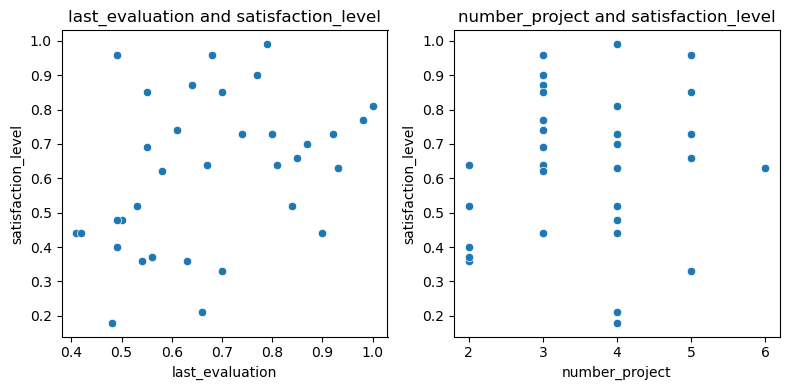

In [46]:
print('Model assumption: Linearity')

# Create a scatterplot for each independent variable and the dependent variable.
# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a scatterplot between Last Evaluation and Satisfaction Level.
sns.scatterplot(x = ols_data['last_evaluation'], y = ols_data['satisfaction_level'],ax=axes[0])

# Set the title of the first plot.
axes[0].set_title("last_evaluation and satisfaction_level")

# Create a scatterplot between Number of Projects and Satisfaction Level.
sns.scatterplot(x = ols_data['number_project'], y = ols_data['satisfaction_level'],ax=axes[1])

# Set the title of the second plot.
axes[1].set_title("number_project and satisfaction_level")

# Set the xlabel of the second plot.
axes[1].set_xlabel("number_project")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()


Model assumption: Normality


C:\Users\User\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


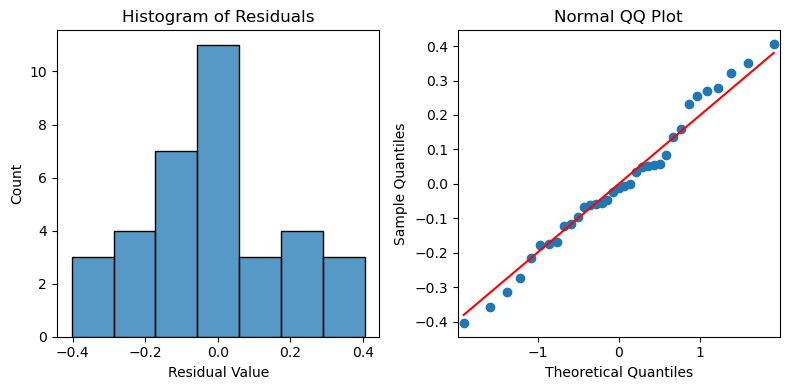

In [48]:
print('Model assumption: Normality')

# Calculate the residuals.
residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals. 
sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()


Model assumption: Constant variance


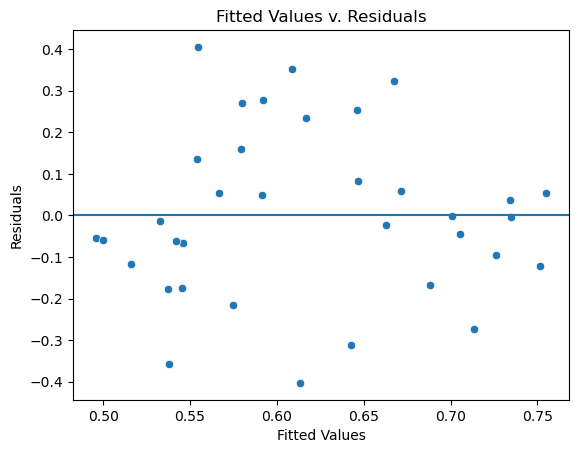

In [49]:
print('Model assumption: Constant variance')

# Create a scatterplot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label.
fig.set_xlabel("Fitted Values")

# Set the y axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.
fig.axhline(0)

# Show the plot.
plt.show()


Multicollinearity


C:\Users\User\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     satisfaction_level   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     2.394
Date:                Tue, 09 Apr 2024   Prob (F-statistic):              0.107
Time:                        11:04:20   Log-Likelihood:                 6.9224
No. Observations:                  35   AIC:                            -7.845
Df Residuals:                      32   BIC:                            -3.179
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2854      0.163      1.748      0.090      -0.047       0.618
number_project      0.0129      0.037      0.346      0.732      -0.063       0.089
last_evaluation     0.4183      0.225      1.856      0.073      -0.041       0.878
==============================================================================
Omnibus:                        0.237   Durbin-Watson:                   1.251
Prob(Omnibus):                  0.888   Jarque-Bera (JB):                0.431
Skew:                           0.105   Prob(JB):                        0.806
Kurtosis:                       2.498   Cond. No.                         28.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

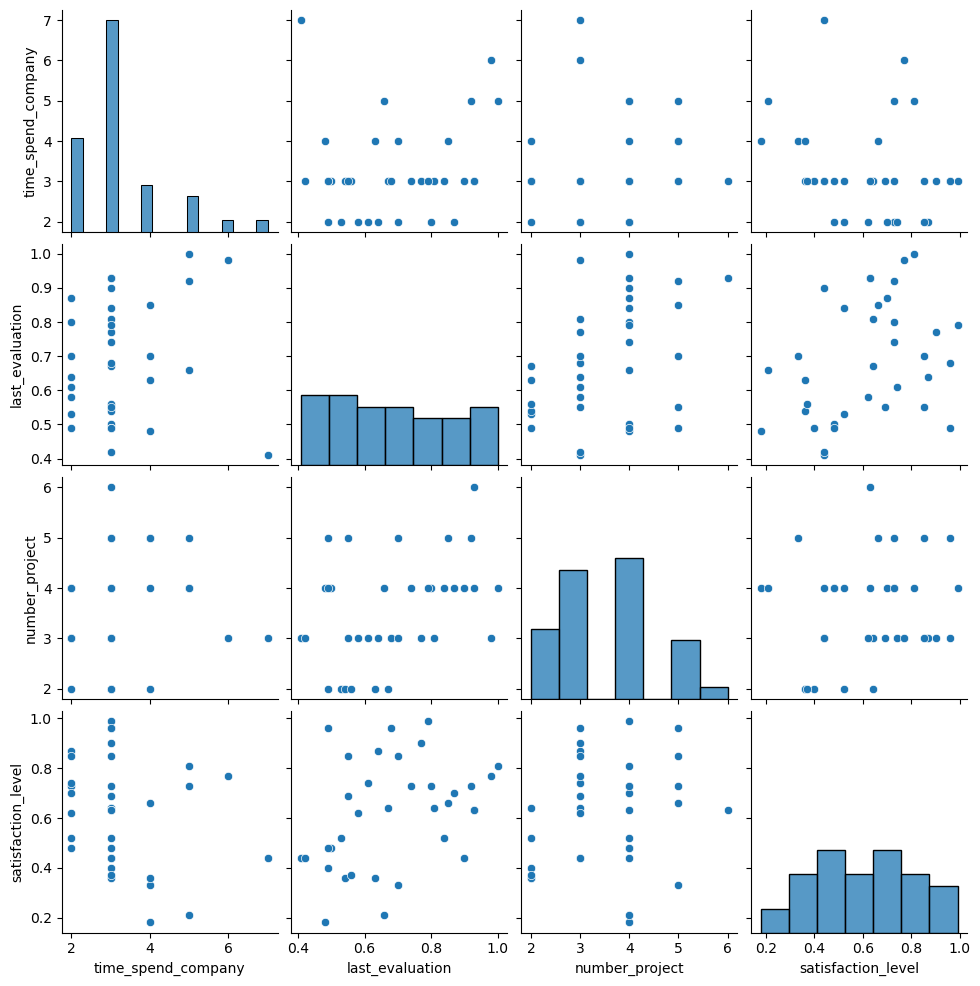

In [53]:
print('Multicollinearity')
# Create a pairplot of the data.
sns.pairplot(ols_data)

# Calculate the variance inflation factor (optional).
# Import variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a subset of the data with the continous independent variables. 
X = ols_data[['number_project','satisfaction_level']]

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

# Display the model results summary.
model_results